In [3]:
# -*- coding: utf-8 -*- 
#在Python脚本的最前面添加以下代码，以指定该脚本处理数据时所使用的编码格式，需要注意的是一定要在最前面加这句话，否则可能会有问题
# 沪市指数走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime, timedelta
import calendar

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

# 数据加载
#df = pd.read_csv('./shanghai_index_1990_12_19_to_2020_03_12.csv')
df = pd.read_csv('C:/Users/ttrfakd/002074.csv',encoding="gbk")
#print(df.head())

df = df[['日期','收盘价']]
#print(df.head())
df.rename(columns=lambda x:x.replace('日期','Timestamp'), inplace=True)
df.rename(columns=lambda x:x.replace('收盘价','Price'), inplace=True)

# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp #这里的index的类型是一个object而不是一个datetime

# 数据探索

#print(df.head())

# 按照月线，年线250天来统计, resample是重采样，重采样周期为可以为分钟，月，季度，年，方式为聚合sum，平均mean...
df_week1 = df.resample('W-Fri').mean()

df_month = df.resample('M').mean()
#df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean() #时期重采样

print('周线平均价:\n',df_week1)
print('-'*88)
print('月线平均价:\n',df_month)
print('-'*88)
print('年线平均价:\n',df_year)
"""
时期的频率转换
freq
A-DEC: 以 12 月份作为结束的年时期
A-NOV: 以 11 月份作为结束的年时期
Q-DEC: 以 12 月份作为结束的季度时期
"""


周线平均价:
                 Price
Timestamp            
2006-10-20  14.996667
2006-10-27  15.436000
2006-11-03  14.280000
2006-11-10  14.058000
2006-11-17  14.270000
...               ...
2020-09-18  23.064000
2020-09-25  22.790000
2020-10-02  22.616667
2020-10-09  24.560000
2020-10-16  25.462000

[731 rows x 1 columns]
----------------------------------------------------------------------------------------
月线平均价:
                 Price
Timestamp            
2006-10-31  15.106000
2006-11-30  14.185909
2006-12-31  14.335238
2007-01-31  15.510500
2007-02-28  15.565333
...               ...
2020-06-30  28.992500
2020-07-31  27.576957
2020-08-31  25.779048
2020-09-30  23.259545
2020-10-31  25.311667

[169 rows x 1 columns]
----------------------------------------------------------------------------------------
年线平均价:
                 Price
Timestamp            
2006-12-31  14.418679
2007-12-31  16.783388
2008-12-31  12.860935
2009-12-31  11.725533
2010-12-31  13.660455
2011-12-31  13.609344
20

'\n时期的频率转换\nfreq\nA-DEC: 以 12 月份作为结束的年时期\nA-NOV: 以 11 月份作为结束的年时期\nQ-DEC: 以 12 月份作为结束的季度时期\n'

In [13]:

#在金融领域常用的聚合方式–OHLC，它会计算各个面元的：第一个值(开盘)、最后一个值(收盘)、最大值和最小值，并产生一个DataFrame

df_week2 = df['Price'].resample('W-FRI').ohlc()

df_5days = df['Price'].resample('5D').ohlc()
df_10days = df['Price'].resample('10D').ohlc()
df_30days = df['Price'].resample('30D').ohlc()
df_60days = df['Price'].resample('60D').ohlc()
df_120days = df['Price'].resample('120D').ohlc()
df_250days = df['Price'].resample('250D').ohlc()



print('5日平均价:\n',df_5days)
print('-'*88)
print('10日平均价:\n',df_10days)
print('-'*88)
print('30日平均价:\n',df_30days)
print('-'*88)
print('60日平均价:\n',df_60days)
print('-'*88)
print('120日平均价:\n',df_120days)
print('-'*88)
print('250日平均价:\n',df_250days)
print('-'*88)




5日平均价:
              open   high    low  close
Timestamp                             
2006-10-18  14.76  15.48  14.75  14.75
2006-10-23  15.75  15.85  14.97  14.97
2006-10-28  14.59  14.59  14.30  14.46
2006-11-02  13.95  14.10  13.70  13.70
2006-11-07  14.13  14.39  13.89  13.89
...           ...    ...    ...    ...
2020-09-24  22.31  22.31  21.85  21.85
2020-09-29  22.20  23.80  22.20  23.80
2020-10-04    NaN    NaN    NaN    NaN
2020-10-09  24.56  26.13  24.56  26.13
2020-10-14  25.65  25.65  24.30  24.30

[1023 rows x 4 columns]
----------------------------------------------------------------------------------------
10日平均价:
              open   high    low  close
Timestamp                             
2006-10-18  14.76  15.85  14.75  14.97
2006-10-28  14.59  14.59  13.70  13.70
2006-11-07  14.13  14.45  13.89  14.05
2006-11-17  14.02  14.50  13.70  14.50
2006-11-27  14.68  15.06  14.31  15.06
...           ...    ...    ...    ...
2020-09-04  24.82  24.82  21.73  22.28
2020-09-14 

最优模型:                                 SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  169
Model:               SARIMAX(1, 1, 4)   Log Likelihood                -445.692
Date:                Mon, 19 Oct 2020   AIC                            903.384
Time:                        17:16:24   BIC                            921.947
Sample:                    10-31-2006   HQIC                           910.920
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7798      0.253     -3.087      0.002      -1.275      -0.285
ma.L1          0.5654      0.251      2.254      0.024       0.074       1.057
ma.L2         -0.2197      0.105     -2.093  

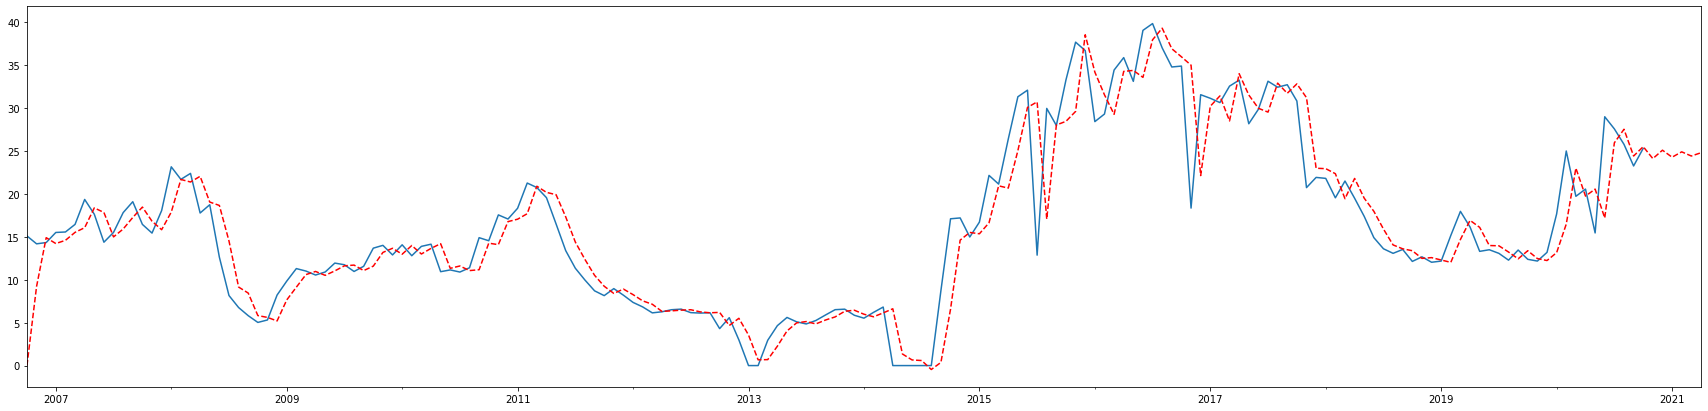

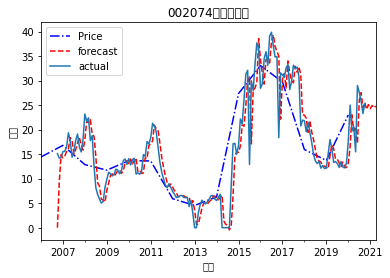

In [27]:
#ARIMA模型
    # 随机过程的特征有均值、方差、协方差等。如果随机过程的特征随着时间变化，则此过程是非平稳的；相反，如果随机过程的特征不随时间而变化，就称此过程是平稳的。非平稳时间序列分析时，若导致非平稳的原因是确定的，可以用的方法主要有趋势拟合模型、季节调整模型、移动平均、指数平滑等方法。若导致非平稳的原因是随机的，方法主要有ARIMA（autoregressive integrated moving average）及自回归条件异方差模型等。

# 可以用来对付 ‘随机过程的特征随着时间变化而非固定’ 且 ‘导致时间序列非平稳的原因是随机而非确定’ 的问题。不过，如果是从一个非平稳的时间序列开始， 首先需要做差分，直到得到一个平稳的序列。

# input，output 是什么？输入历史数据，预测未来时间点的数据
"""
ARIMA模型运用的基本流程有几下几步：
https://www.jianshu.com/p/f547bb4b50c3
1. 数据可视化，识别平稳性。
2. 对非平稳的时间序列数据，做差分，得到平稳序列。
3. 建立合适的模型。
平稳化处理后，若偏自相关函数是截尾的，而自相关函数是拖尾的，则建立AR模型；
若偏自相关函数是拖尾的，而自相关函数是截尾的，则建立MA模型；
若偏自相关函数和自相关函数均是拖尾的，则序列适合ARMA模型。
模型的阶数在确定之后，对ARMA模型进行参数估计，比较常用是最小二乘法进行参数估计。
4. 假设检验，判断（诊断）残差序列是否为白噪声序列。
5. 利用已通过检验的模型进行预测。
"""

# 设置参数范围
ps = range(0, 5) # 为相应的自回归项
qs = range(0, 5) # 相应的移动平均项数
ds = range(1, 2) # 差分的阶数，用来得到平稳序列

"""
#时间序列的差分
diff1 = df_month.diff(1)
diff1.plot(figsize=(12,6))
diff2 = df_month.diff(2)
diff2.plot(figsize=(12,6))
#-> 二阶差分侯差异不大，所以这里d设置为1即可
"""

parameters = product(ps, ds, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        #model = ARIMA(df_month.Price,order=(param[0], param[1], param[2])).fit()
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_month.Price,
                                order=(param[0], param[1], param[2]),
                                #seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())

# 设置future_month，需要预测的时间date_list
df_month2 = df_month[['Price']]
future_month = 6
last_month = pd.to_datetime(df_month2.index[len(df_month2)-1])
date_list = []
for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year
    month = last_month.month
    if month == 12:
        month = 1
        year = year+1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]
    #print(next_month_days)
    last_month = last_month + timedelta(days=next_month_days)
    date_list.append(last_month)
print('date_list=', date_list)

# 添加未来要预测的6个月
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])

# get_prediction得到的是区间，使用predicted_mean
df_month2['forecast'] = best_model.get_prediction(start=0, end=len(df_month2)).predicted_mean

# 指数预测结果显示
plt.figure(figsize=(30,7))
df_month2.Price.plot(label='actual')
df_month2.forecast.plot(color='r', ls='--', label='forecast')
# 指数预测结果于股票年线比较
df_year.plot(color='b', ls='dashdot', label='year line')
df_month2.forecast.plot(color='r', ls='--', label='forecast')
df_month2.Price.plot(label='actual')

plt.legend()
plt.title('002074指数（月）')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()
# 解决matplotlib中文显示问题Font family [sans-serif] not found https://blog.csdn.net/weixin_39956356/article/details/106410135



arma_mod70: 925.0095999326327 953.125275747262 936.4203103087546
arma_mod01: 923.1400095646211 932.5119015028308 926.9435796899951
arma_mod71: 926.8370024211201 958.0766422151527 939.5155695057
1.990685155259693
            AC          Q  Prob(>Q)
lag                                
1.0   0.004301   0.003164  0.955145
2.0   0.016067   0.047576  0.976493
3.0   0.002166   0.048387  0.997210
4.0  -0.011947   0.073245  0.999346
5.0  -0.004346   0.076555  0.999916
6.0  -0.010719   0.096811  0.999982
7.0  -0.015393   0.138845  0.999993
8.0  -0.071944   1.062754  0.997820
9.0  -0.070644   1.959162  0.992097
10.0  0.006838   1.967613  0.996582
11.0  0.028633   2.116757  0.998042
12.0  0.036309   2.358120  0.998626
13.0  0.028463   2.507393  0.999207
14.0  0.052339   3.015418  0.999046
15.0 -0.030523   3.189326  0.999413
16.0  0.108312   5.393614  0.993423
17.0 -0.045828   5.790853  0.994484
18.0 -0.006356   5.798544  0.996947
19.0 -0.015465   5.844384  0.998272
20.0  0.001938   5.845110  0.999

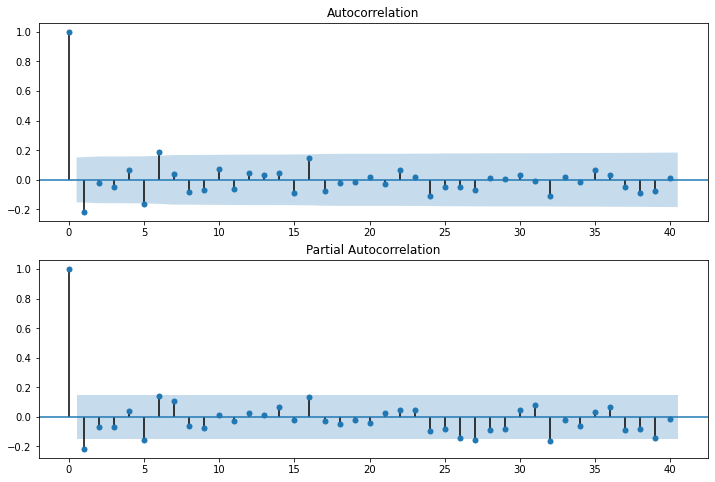

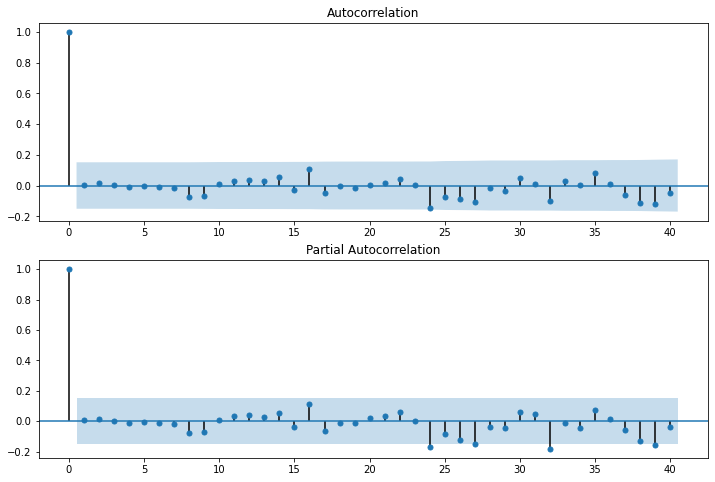

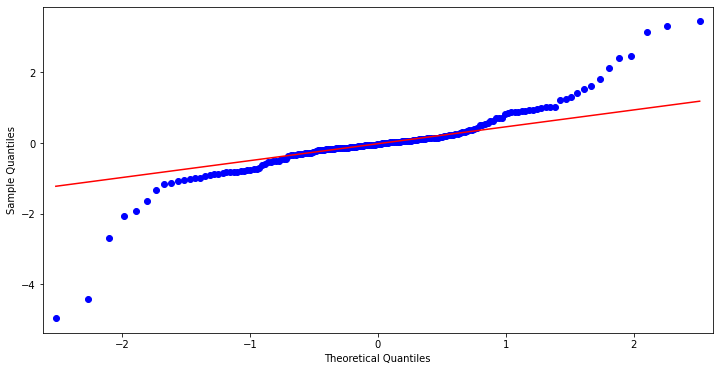

In [34]:
# 先检查平稳时间序列的自相关图和偏自相关图
diff1.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)
#定哪个模型最合适，可以采用如下准则进行判定
arma_mod70 = sm.tsa.ARMA(diff1,(7,0)).fit()
print("arma_mod70:",arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod01 = sm.tsa.ARMA(diff1,(0,1)).fit()
print("arma_mod01:",arma_mod01.aic,arma_mod01.bic,arma_mod01.hqic)
arma_mod71 = sm.tsa.ARMA(diff1,(7,1)).fit()
print("arma_mod71:",arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
#残差做自相关图：
resid = arma_mod70.resid#残差
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
#D－W检验
print(sm.stats.durbin_watson(resid))
#是否符合正态分布
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

#对于ARIMA模型，其残差被假定为高斯白噪声序列，所以当我们用ARIMA模型去拟合数据时，拟合后我们要对残差的估计序列进行LB检验，判断其是否是高斯白噪声，如果不是，那么就说明ARIMA模型也许并不是一个适合样本的模型。检验的结果就是看最后一列前十二行的检验概率（一般观察滞后1~12阶），如果检验概率小于给定的显著性水平，比如0.05就拒绝原假设，其原假设是相关系数为零。就结果来看，如果取显著性水平大于0.05，那么相关系数与零没有显著差异，即为白噪声序列。

import numpy as np
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))